In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error

In [18]:
# loading the data
# the return_X_y=True to download only the independent and dependent variables
X, y = load_boston(return_X_y=True)
# don't forget normalization!
X = StandardScaler().fit_transform(X)
num_examples, num_features = X.shape
print(f'number of examples: {num_examples}')
print(f'number of features: {num_features}')
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

number of examples: 506
number of features: 13


In [19]:
# Functions for evaluating model and plot rmses as function of lambda
# where lambda is the coefficient of the regularization term
def evaluate_model(Model, lambdas):
    rmses_train, rmses_test = [], []
    for l in lambdas:
        # alpha is the lambda in the slides
        # Model will be either Lasso, Ridge or ElasticNet
        # Since analytic solution may no longer exists,
        # the model is train using iterative method (gradient descent)
        model = Model(alpha=l, max_iter=1000)
        model.fit(X_train, y_train)

        y_train_predict = model.predict(X_train)
        rmses_train.append(np.sqrt(mean_squared_error(y_train, y_train_predict)))

        y_test_predict = model.predict(X_test)
        rmses_test.append(np.sqrt(mean_squared_error(y_test, y_test_predict)))
        
    return rmses_train, rmses_test

def plot(lambdas, rmses_train, rmses_test, title):
    fig, ax = plt.subplots(1, 1)
    ax.plot(lambdas, rmses_train, label="train MSE")
    ax.plot(lambdas, rmses_test, label="test MSE")
    ax.set_xlabel("$\\lambda$")
    ax.set_ylabel("RMSE")
    ax.set_title(title, fontsize=20)
    ax.legend(fontsize=14)
    plt.show()

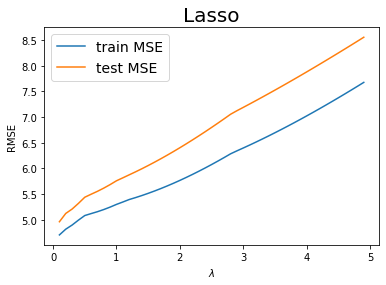

In [20]:
model, title = Lasso, 'Lasso'
lambdas = np.arange(0.1, 5, 0.1)
rmses_train, rmses_test = evaluate_model(model, lambdas)
plot(lambdas, rmses_train, rmses_test, title)

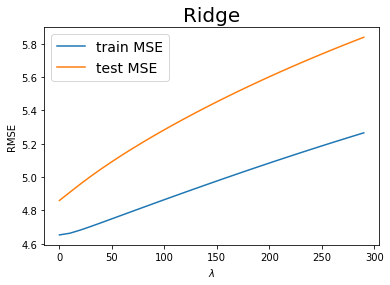

In [21]:
model, title = Ridge, 'Ridge'
lambdas = np.arange(0, 300, 10)
rmses_train, rmses_test = evaluate_model(model, lambdas)
plot(lambdas, rmses_train, rmses_test, title)

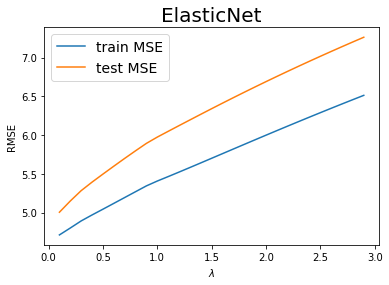

In [22]:
model, title = ElasticNet, 'ElasticNet'
lambdas = np.arange(0.1, 3, .1)
rmses_train, rmses_test = evaluate_model(model, lambdas)
plot(lambdas, rmses_train, rmses_test, title)